# Boosting-Techniques

1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to form a strong learner. It works by sequentially training models, where each new model focuses on correcting the errors made by the previous ones.

2. How does Boosting differ from Bagging?
Boosting builds models sequentially, each one correcting the previous model's errors. It gives more weight to misclassified data.
Bagging (e.g., Random Forest) builds models in parallel, with each model trained on a random subset of the data using bootstrapping.

3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns higher weights to misclassified data points so that subsequent classifiers focus more on difficult examples. Final prediction is a weighted majority vote of all classifiers.

4. Explain the working of AdaBoost with an example.
Start with equal weights for all training samples.
Train a weak classifier.
Increase weights of misclassified samples.
Train next classifier with the updated weights.
Repeat steps 2–4.
Combine classifiers’ predictions using a weighted vote.
Example: If the first model misclassifies a few points, the second model pays more attention to those. This continues until the desired accuracy or number of iterations is reached.

5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting builds models sequentially by optimizing a loss function using gradient descent. Unlike AdaBoost, which focuses on adjusting sample weights, Gradient Boosting fits the new model to the residuals (errors) of the previous model.

6. What is the loss function in Gradient Boosting?
It depends on the problem:
Regression: Mean Squared Error (MSE)
Classification: Log Loss (Cross-Entropy)
The loss function guides the optimization during training.

7. How does XGBoost improve over traditional Gradient Boosting?
Regularization to prevent overfitting
Parallel processing
Tree pruning
Sparse-aware (handles missing values)
Better handling of large datasets with out-of-core computation

8. What is the difference between XGBoost and CatBoost?
Feature	XGBoost	CatBoost
Categorical Data	Needs encoding	Handles natively
Training Speed	Fast	Comparable or faster for some tasks
Overfitting	Good regularization	Also uses ordered boosting to reduce overfit

9. What are some real-world applications of Boosting techniques?
Fraud detection
Credit scoring
Medical diagnosis
Customer churn prediction
Stock price prediction
Recommendation systems

10. How does regularization help in XGBoost?
Regularization (L1 and L2) controls model complexity, helps avoid overfitting, and improves generalization. It penalizes overly complex trees and excessive leaf weights.

11. What are some hyperparameters to tune in Gradient Boosting models?
learning_rate: Controls how much each tree contributes.
n_estimators: Number of boosting rounds.
max_depth: Maximum tree depth.
min_samples_split: Minimum samples required to split a node.
subsample: Percentage of samples used per tree.
colsample_bytree: Percentage of features used per tree.
gamma: Minimum loss reduction required to split.

12. What is the concept of Feature Importance in Boosting?
Feature importance indicates how useful each feature was in improving model performance. Boosting models calculate it by:
Frequency of a feature used in splits
Total gain from splits using that feature
Permutation-based importance

13. Why is CatBoost efficient for categorical data?
CatBoost:
Uses ordered boosting to prevent target leakage
Converts categorical features using mean encoding with permutations
Automatically handles categorical variables without preprocessing

In [5]:
# Q14 Train an AdaBoost Classifier on a sample dataset and print model accuracy
import warnings as w
w.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9111111111111111


In [7]:
#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

reg = AdaBoostRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.7834037382909573


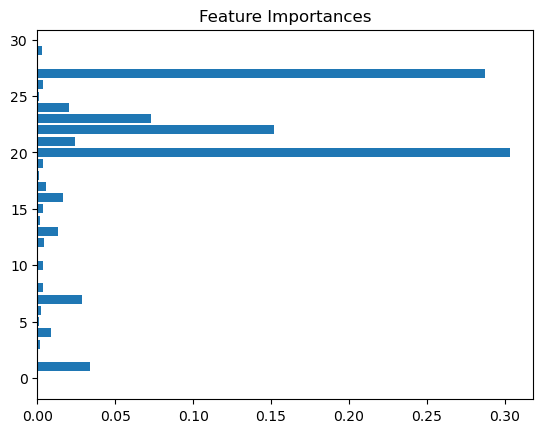

In [9]:
#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("Feature Importances")
plt.show()

In [11]:
#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.8588751967024398


In [23]:
#18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb_model.predict(X_test))

print("XGBoost Accuracy:", xgb_acc)
print("Gradient Boosting Accuracy:", gb_acc)

XGBoost Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.9707602339181286


In [25]:
#19. Train a CatBoost Classifier and evaluate using F1-Score.
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

F1 Score: 0.9675213675213675


In [27]:
#20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.04294529474526525


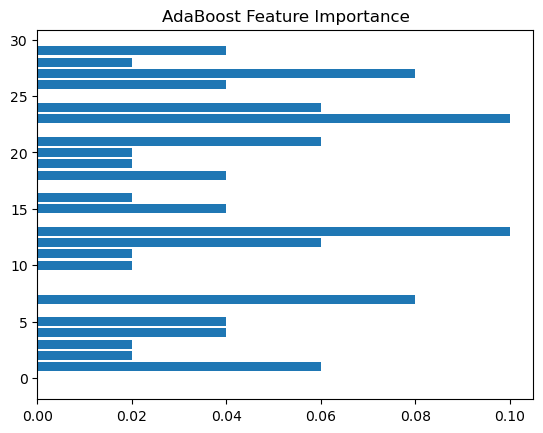

In [29]:
#21. Train an AdaBoost Classifier and visualize feature importance.
import numpy as np

model = AdaBoostClassifier()
model.fit(X_train, y_train)
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.title("AdaBoost Feature Importance")
plt.show()

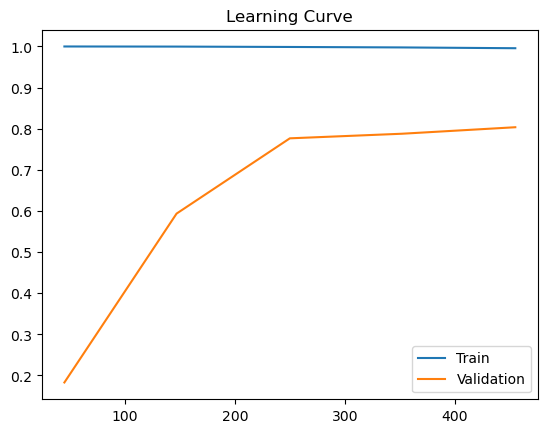

In [31]:
#22. Train a Gradient Boosting Regressor and plot learning curves.
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(GradientBoostingRegressor(), X, y)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.legend()
plt.title("Learning Curve")
plt.show()

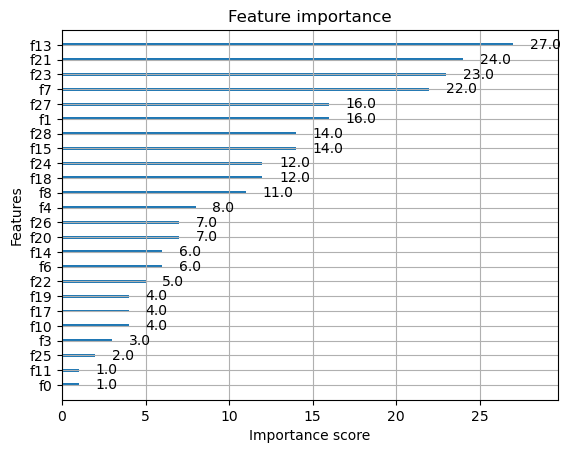

In [35]:
#23. Train an XGBoost Classifier and visualize feature importance.
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model)
plt.show()

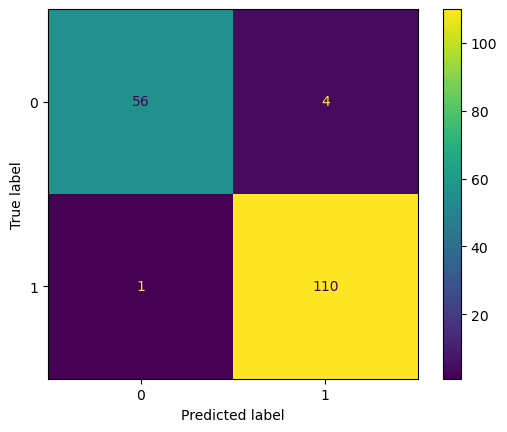

In [37]:
#24. Train a CatBoost Classifier and plot the confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [39]:
#25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.
for n in [10, 50, 100]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Estimators: {n}, Accuracy: {acc:.3f}")

Estimators: 10, Accuracy: 0.947
Estimators: 50, Accuracy: 0.965
Estimators: 100, Accuracy: 0.965


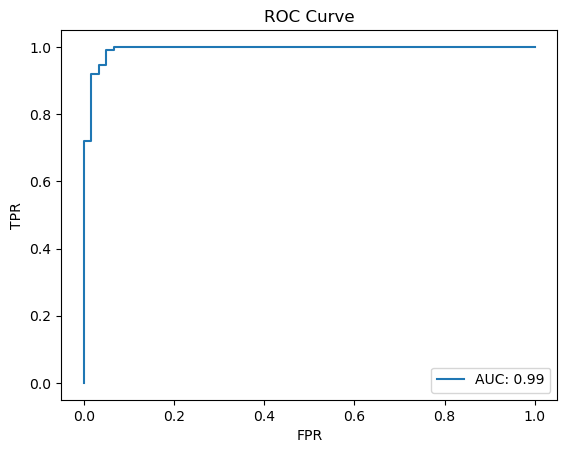

In [41]:
#26. Train a Gradient Boosting Classifier and visualize the ROC curve.
from sklearn.metrics import roc_curve, auc

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC: {auc(fpr, tpr):.2f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [43]:
#27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.3]}
model = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)
print("Best learning rate:", model.best_params_)

Best learning rate: {'learning_rate': 0.3}


In [45]:
#28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2)

model_balanced = CatBoostClassifier(verbose=0, class_weights=[1, 10])
model_balanced.fit(X, y)
print("Balanced model trained successfully")

Balanced model trained successfully


In [47]:
#29. Train an AdaBoost Classifier and analyze the effect of different learning rates.
for lr in [0.01, 0.1, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Learning Rate: {lr}, Accuracy: {acc:.3f}")


Learning Rate: 0.01, Accuracy: 0.953
Learning Rate: 0.1, Accuracy: 0.965
Learning Rate: 1.0, Accuracy: 0.965


In [49]:
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
from sklearn.metrics import log_loss

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = XGBClassifier(objective='multi:softprob', num_class=3)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))



Log Loss: 0.31173826369128294
